In [1]:
# 자연어 처리 NLP(Natural language processing)
# 응용
    # 언어번역, 댓글분석->예측, 쳇봇, 시나 소설 또는 뉴스기사를 대략적으로 만들기
    
# 실습.... - 기존의 제공하는 데이터셋을 이용  IMDB 영화 평점 데이터셋(영어)
# 문장을 분석하는데 있어 특징
# NOISE가 심하다.
# 형태소 분석
# 다양한 언어의 특성
# 신경망에 입력--> 수치로 변환

In [2]:
# 텍스트 데이터를 변환하는 과정
# 1. 말뭉치(corpus)
# i love you but ... ... ... ... .. .. .. .. ...
# 2. 단어 수집(괄호는 빈도수)
# i(2), love(100)
# 3. 파이썬 딕션너리 구조로 표현  {'i':2, 'love':100 ....}
# 4. 텍스트를 숫자형태의 코드로 변환 
# i love you   -> [1 2 3]
# i have car   -> [1 4 5]
# the car is bufifule -> [6 5 7 8]

In [3]:
# onehot 으로 표현.... 단어들은 수치가 아니여서 스케일을 못해... oneHot 표현.... 
# 단점 : 메모리낭비..(단어가 기하급수적으로 늘어나면.... )
# 단어사이의 연관관계를표현 못함
# --> 단어 임베딩...

In [4]:
# IMDB 원본 데이터
import os
# 데이터 로드
x=[]; y=[]
root_path = 'D:/이규영/ml/aclImdb/aclImdb/test'
for path in os.listdir(root_path):
    if os.path.isdir(root_path+'/'+path):
        for fileName in os.listdir(root_path+'/'+path):
            with open(root_path+'/'+path+'/'+fileName, 'r', encoding='utf-8') as f:
                x.append(f.read()); y.append(path)
                
print(f"첫번째 댓글{x[0]} 평가 : {y[0]}"); print(f"마지막 댓글{x[-1]} 평가 : {y[-1]}");

첫번째 댓글Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in. 평가 : neg
마지막 댓글When I saw this movie for the first time I was both surprised and a little sho

In [5]:
# 텐서플로우가 제공하는 데이터는 사용하기 좋게 미리 가공한 데이터
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras import preprocessing

In [6]:
# 텐서플로가 제공하는 간소화된 imdb 데이터 읽기  사전의 갯수를 지정할수 있음
dicSize = 10000
(x_train,y_train),(x_target,y_target) =imdb.load_data(num_words=dicSize)

In [7]:
print(x_train.shape, y_train.shape)
print(x_train[0], y_train[0])

(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1


In [8]:
import numpy as np
np.unique(y_train)

array([0, 1], dtype=int64)

In [9]:
# 단어 빈도수, 빈도수 단어로 변환하는 기준표 -- 노래데이터 기준표를 상기하면서....
word_index =  imdb.get_word_index()  # 단어:빈도수
index_word = {value:key for key,value in  word_index.items()}  # 빈도수:단어
print(len(word_index), len(index_word))

88584 88584


In [10]:
# 크기가아니라.데이터의 집합중에 빈도수가 가장많은 상위 20의 데이터 확인
sorted(index_word.items())[::-1][:20]
for key,value in  sorted(index_word.items(),reverse=True)[:20]:
    print(value,end='/')

'l'/voorhees'/artbox/copywrite/pipe's/wheelers/sics/transacting/chicatillo/ev/urrrghhh/airsoft/nemesis'/guard's/'solve'/odilon/baywatch'/heralding/lubricated/percival/

In [12]:
# 단어임베딩
# 단어를 저차원 공간의 벡터로 표현
# 단어는 수백차원을 사용, 밀집벡터, 신경망 학습을 통해 알아냄
# korea->seoul  spain->madrid,  japan ->toko ... 

In [13]:
x_train.shape, x_target.shape

((25000,), (25000,))

In [14]:
embeded_space_dim = 16  # 16차원의 임베딩 공간
sample_size = 512 # 샘플의 길이
x_train =  preprocessing.sequence.pad_sequences(x_train,maxlen=sample_size)
x_target = preprocessing.sequence.pad_sequences(x_target,maxlen=sample_size)  # 샘플크기를 512로 고정하고 512보다 작은샘플은 
# pad_sequences 함수가 특수 문자로 채워줌
x_train.shape, x_target.shape

((25000, 512), (25000, 512))

In [19]:
embeded_model = Sequential()
embeded_model.add(Embedding(input_dim=dicSize, output_dim=embeded_space_dim,input_length=sample_size))
embeded_model.add(Flatten())
embeded_model.add(Dense(32,activation='relu'))
embeded_model.add(Dense(1,activation='sigmoid'))
embeded_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist = embeded_model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_target,y_target),verbose=1)

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 0.4853 - accuracy: 0.7157 - val_loss: 0.2959 - val_accuracy: 0.8758
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1771 - accuracy: 0.9336 - val_loss: 0.3046 - val_accuracy: 0.8734
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0569 - accuracy: 0.9853 - val_loss: 0.3879 - val_accuracy: 0.8653
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0142 - accuracy: 0.9979 - val_loss: 0.4393 - val_accuracy: 0.8659
Epoch 5/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.4850 - val_accuracy: 0.8669
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5191 - val_accuracy: 0.8671
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 8.2539e-04 - accuracy: 1.0000 - val_loss: 0.5453 - val_accuracy: 0.8676
Ep

In [18]:
# 모델 평가
res = embeded_model.evaluate(x_target,y_target)
res

782/782 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000


[0.0, 0.5]

In [20]:
embeded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 512, 16)           160000    
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                262176    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 422,209
Trainable params: 422,209
Non-trainable params: 0
_________________________________________________________________


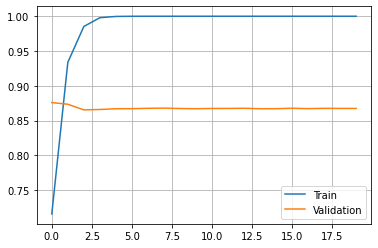

In [21]:
# 학습곡선
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Validation'],loc = 'best')
plt.grid()
plt.show()